In [2]:
%pylab inline 

from pixell import enmap, utils
from pixell import curvedsky

Populating the interactive namespace from numpy and matplotlib


In [3]:
pixel_size = 10.0
lmax = 3000
seed = 1

In [4]:
shape, wcs = enmap.fullsky_geometry(pixel_size * utils.arcmin)

In [5]:
shape

(1081, 2160)

In [6]:
ell = np.arange(2, lmax)
ps = 2.3E-5*2*np.pi/(ell*(ell+1))

In [14]:
ps.shape

(2998,)

In [15]:
alpha_map = curvedsky.rand_map((1,)+shape, wcs, ps, lmax=lmax)

In [10]:
from pixell import enplot

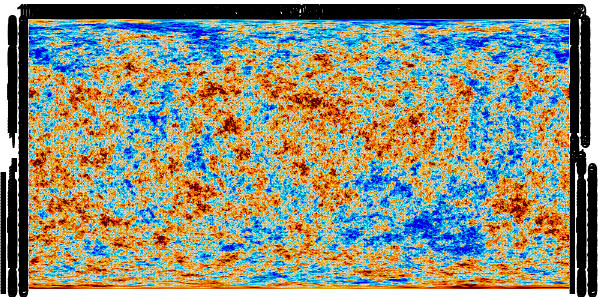

In [13]:
enplot.show(enplot.plot(alpha_map, downgrade=4))

In [21]:
# load a scalar theory cls

from pixell import powspec

ps, _ = powspec.read_camb_scalar("test_scalCls.dat")

In [22]:
ps.shape

(3, 3, 2201)

In [23]:
# generate alms for this

alms, ainfo = curvedsky.rand_alm(ps, lmax=lmax, seed=seed, return_ainfo=True)

In [65]:
cmb_map = enmap.empty((3,)+shape, wcs)
cmb_map = curvedsky.alm2map(alms, cmb_map, ainfo=ainfo)

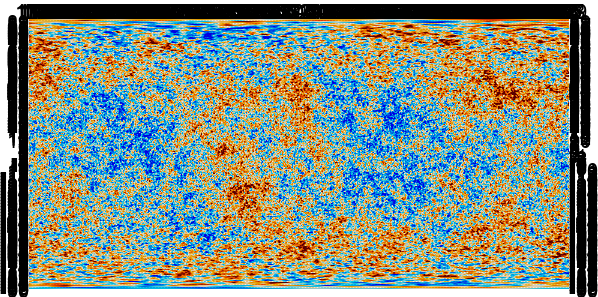

In [66]:
enplot.show(enplot.plot(cmb_map[0], downgrade=4))

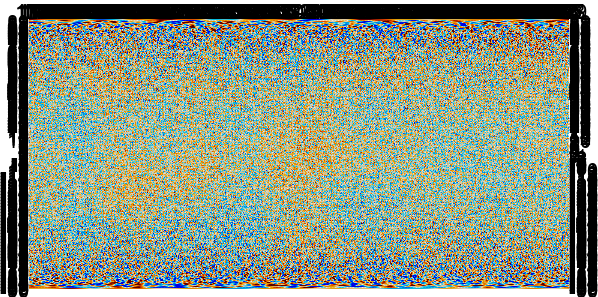

In [67]:
enplot.show(enplot.plot(cmb_map[1], downgrade=4))

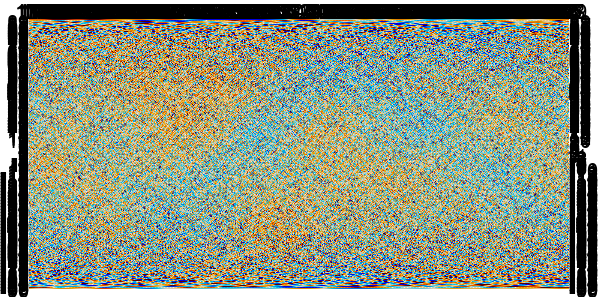

In [68]:
enplot.show(enplot.plot(cmb_map[2], downgrade=4))

In [69]:
Q_map = cmb_map[1]
U_map = cmb_map[2]

Q_map_rot = Q_map * np.cos(2*alpha_map) - U_map * np.sin(2*alpha_map)
U_map_rot = Q_map * np.sin(2*alpha_map) + U_map * np.cos(2*alpha_map)

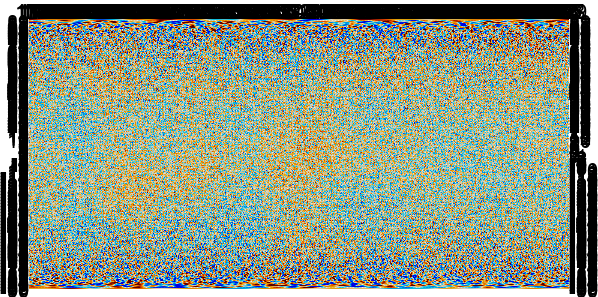

In [70]:
enplot.show(enplot.plot(Q_map_rot, downgrade=4))

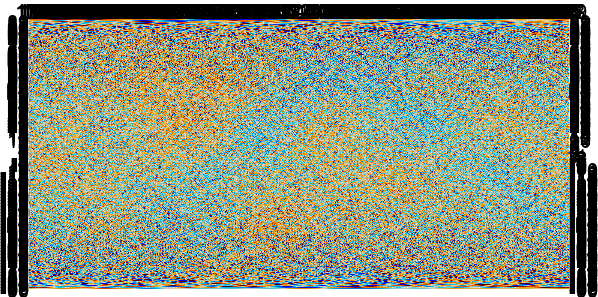

In [71]:
enplot.show(enplot.plot(U_map_rot, downgrade=4))

In [72]:
cmb_map_rot = cmb_map.copy()
cmb_map_rot[1,:,:] = Q_map_rot
cmb_map_rot[2,:,:] = U_map_rot

In [73]:
alm_recon = curvedsky.map2alm(cmb_map_rot, lmax=lmax)

In [74]:
alm_recon.shape

(3, 4504501)

In [75]:
# try rotate polarization method

In [77]:
cmb_map = enmap.empty((3,)+shape, wcs)
cmb_map = curvedsky.alm2map(alms, cmb_map, ainfo=ainfo)

In [78]:
cmb_map_rot2 = enmap.rotate_pol(cmb_map, alpha_map)

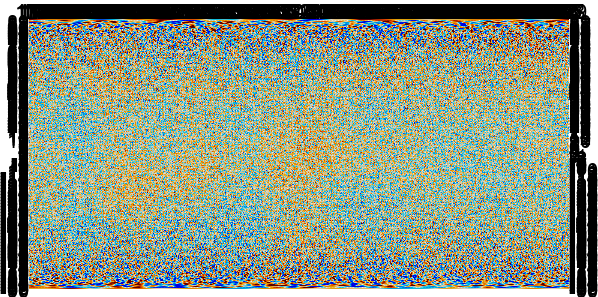

In [79]:
enplot.show(enplot.plot(cmb_map_rot2[1], downgrade=4))

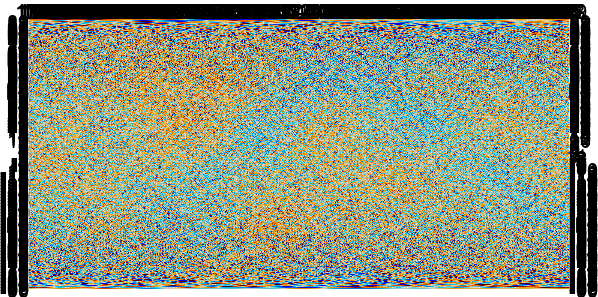

In [80]:
enplot.show(enplot.plot(cmb_map_rot2[2], downgrade=4))

In [84]:
np.sum(cmb_map_rot != cmb_map_rot2)

array(0)

In [85]:
# they are identical